### 1. Pytorch Workflow

In [1]:
# what we will be covering here:
what_will_be_covering ={ 1: "Data (prepare and load)",
                         2: "Building model",
                         3: "Fitting the model to data",
                         4: "Making predactions and evaluate the model",
                         5: "Saving and loading the model",
                         6: "Putting it all togather"

}
what_will_be_covering

{1: 'Data (prepare and load)',
 2: 'Building model',
 3: 'Fitting the model to data',
 4: 'Making predactions and evaluate the model',
 5: 'Saving and loading the model',
 6: 'Putting it all togather'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#check the torch version
torch.__version__

'2.0.1+cu118'

## Data (Preparing and loading)

Data could be any things, lilke :
- Excel spreedsheet
- Images of any kinds
- Videos
- Audio files
- DNA
- Text files

Machine learning is a game of two parts:
1. Get data into a numerical representataions.
2. Build a model to learn patterns in that numerical representation.

** Let's create some data to represent this:
- we will use a regression formula to draw a straight line with known parameters (Y = MX + C)

In [3]:
#create *known* parameters

weights = 0.7
bias = 0.3

#create
start = 6
end = 12
step = 0.02
x = torch.arange(start, end , step).unsqueeze(dim=1)
y = weights * x + bias

x[:10], y[:10]

(tensor([[6.0000],
         [6.0200],
         [6.0400],
         [6.0600],
         [6.0800],
         [6.1000],
         [6.1200],
         [6.1400],
         [6.1600],
         [6.1800]]),
 tensor([[4.5000],
         [4.5140],
         [4.5280],
         [4.5420],
         [4.5560],
         [4.5700],
         [4.5840],
         [4.5980],
         [4.6120],
         [4.6260]]))

## Splitting the data into Training set and test set.
- It is one of the most important topic in ML
- It consist of , Training set, Validation set and Testing set.

In [4]:
 #create a train/test split

train_split = int (0.8 * len(x))
x_train , y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(240, 240, 60, 60)

In [5]:
x_train, y_train

(tensor([[ 6.0000],
         [ 6.0200],
         [ 6.0400],
         [ 6.0600],
         [ 6.0800],
         [ 6.1000],
         [ 6.1200],
         [ 6.1400],
         [ 6.1600],
         [ 6.1800],
         [ 6.2000],
         [ 6.2200],
         [ 6.2400],
         [ 6.2600],
         [ 6.2800],
         [ 6.3000],
         [ 6.3200],
         [ 6.3400],
         [ 6.3600],
         [ 6.3800],
         [ 6.4000],
         [ 6.4200],
         [ 6.4400],
         [ 6.4600],
         [ 6.4800],
         [ 6.5000],
         [ 6.5200],
         [ 6.5400],
         [ 6.5600],
         [ 6.5800],
         [ 6.6000],
         [ 6.6200],
         [ 6.6400],
         [ 6.6600],
         [ 6.6800],
         [ 6.7000],
         [ 6.7200],
         [ 6.7400],
         [ 6.7600],
         [ 6.7800],
         [ 6.8000],
         [ 6.8200],
         [ 6.8400],
         [ 6.8600],
         [ 6.8800],
         [ 6.9000],
         [ 6.9200],
         [ 6.9400],
         [ 6.9600],
         [ 6.9800],


## Building a function to visualize our data

In [7]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 12});

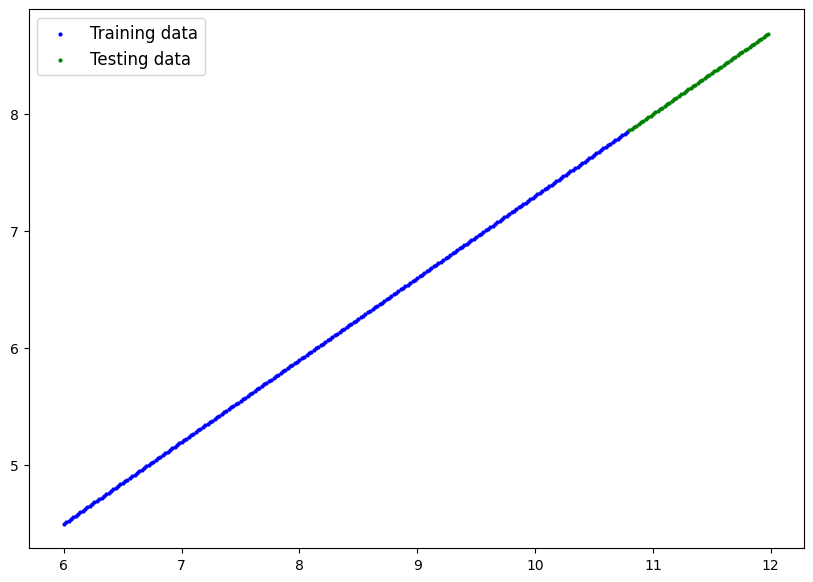

In [10]:
plot_predictions();

## Build the first pyrorch model
- Let's replicate a standard linear regression model using pure PyTorch.

1. Here will be using two main algorithms:
   - Gradient descent
   - Backpropagation

In [8]:
#loading libraries
import torch
from torch import nn
from torch import float32

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)




## Pytorch model building blocks (Essentials)
- *torch.nn  * - Contain all the buildings for the computational graphs.
- *torch.nn.Parameters * - What parameters our model should try and learn.
- *torch.nn.Module * - The base class for all neural network module.
- *torch.optim * - The optimizer in pytorch lives here.
- *def forward * - All nn module subclasses requires you to write forward.

## Now , let's check the content of our pytorch model

- so, we may check our model parameters/what's inside the model by .Parameters()

In [9]:
#Create a random seeds
torch.manual_seed(42)

#Now, create an instance of our mode LinearRegressionmodel

model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
#list the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weights, bias

(0.7, 0.3)

In [12]:
x_test, y_test

(tensor([[10.8000],
         [10.8200],
         [10.8400],
         [10.8600],
         [10.8800],
         [10.9000],
         [10.9200],
         [10.9400],
         [10.9600],
         [10.9800],
         [11.0000],
         [11.0200],
         [11.0400],
         [11.0600],
         [11.0800],
         [11.1000],
         [11.1200],
         [11.1400],
         [11.1600],
         [11.1800],
         [11.2000],
         [11.2200],
         [11.2400],
         [11.2600],
         [11.2800],
         [11.3000],
         [11.3200],
         [11.3400],
         [11.3600],
         [11.3800],
         [11.4000],
         [11.4200],
         [11.4400],
         [11.4600],
         [11.4800],
         [11.5000],
         [11.5200],
         [11.5400],
         [11.5600],
         [11.5800],
         [11.6000],
         [11.6200],
         [11.6400],
         [11.6600],
         [11.6800],
         [11.7000],
         [11.7200],
         [11.7400],
         [11.7600],
         [11.7800],


- making predictions using torch..inferance_mode()

In [13]:
#checking prediction power of model

with torch.inference_mode():
  y_pred = model_0(x_test)


y_pred



tensor([[3.7651],
        [3.7718],
        [3.7785],
        [3.7853],
        [3.7920],
        [3.7987],
        [3.8055],
        [3.8122],
        [3.8189],
        [3.8257],
        [3.8324],
        [3.8391],
        [3.8459],
        [3.8526],
        [3.8593],
        [3.8661],
        [3.8728],
        [3.8795],
        [3.8863],
        [3.8930],
        [3.8997],
        [3.9065],
        [3.9132],
        [3.9199],
        [3.9267],
        [3.9334],
        [3.9401],
        [3.9469],
        [3.9536],
        [3.9603],
        [3.9671],
        [3.9738],
        [3.9805],
        [3.9873],
        [3.9940],
        [4.0007],
        [4.0075],
        [4.0142],
        [4.0209],
        [4.0277],
        [4.0344],
        [4.0412],
        [4.0479],
        [4.0546],
        [4.0614],
        [4.0681],
        [4.0748],
        [4.0816],
        [4.0883],
        [4.0950],
        [4.1018],
        [4.1085],
        [4.1152],
        [4.1220],
        [4.1287],
        [4

In [14]:
y_test

tensor([[7.8600],
        [7.8740],
        [7.8880],
        [7.9020],
        [7.9160],
        [7.9300],
        [7.9440],
        [7.9580],
        [7.9720],
        [7.9860],
        [8.0000],
        [8.0140],
        [8.0280],
        [8.0420],
        [8.0560],
        [8.0700],
        [8.0840],
        [8.0980],
        [8.1120],
        [8.1260],
        [8.1400],
        [8.1540],
        [8.1680],
        [8.1820],
        [8.1960],
        [8.2100],
        [8.2240],
        [8.2380],
        [8.2520],
        [8.2660],
        [8.2800],
        [8.2940],
        [8.3080],
        [8.3220],
        [8.3360],
        [8.3500],
        [8.3640],
        [8.3780],
        [8.3920],
        [8.4060],
        [8.4200],
        [8.4340],
        [8.4480],
        [8.4620],
        [8.4760],
        [8.4900],
        [8.5040],
        [8.5180],
        [8.5320],
        [8.5460],
        [8.5600],
        [8.5740],
        [8.5880],
        [8.6020],
        [8.6160],
        [8

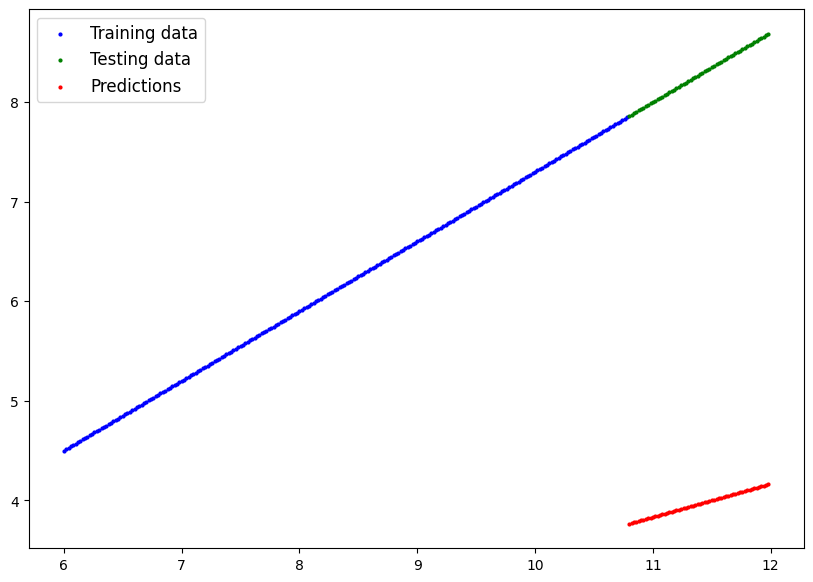

In [15]:
#let's plot the predections

plot_predictions(predictions=y_pred)

## Training a model with Pytorch (Intution building)

1. Train the model
 ** loss function **
  - One way to measure how poor / how wrong your model predicts is to use the loss function in pytorch.
  - loss function may also sometimes called cost function.
** Optimizers **
  - it takes into account the loss of a model and adjust the model's parameters (Weights, biases)

  -- For pytorch , specially we need:
  1. Training loop
  2. Testing loop



In [16]:
#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# setup a loss function
loss_fn = nn.L1Loss()

# set up an optimizer (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #lr=learning rate, the most important hyperparameters


In [19]:
loss_fn

L1Loss()

### Building a training loop (and a testing loop)  in Pytorch

For this , we need a coupl of thigs:
1. Loop through the data
2. Forward pass (to make predictions on data- also called forward propagation)
3. Calculate the loss(compare forward pass predictions to the ground truth available)
4. Optimizer zero grad
5. Loss backward (move backward through the network to calculate the gradients of each parameters of the model wrt loss function)
6. Optimizer step -use the optimizer to adjust the model's parameters to try and improve the loss (**Gredient descent**)

In [20]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [37]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(x_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(x_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.36367490887641907 | MAE Test Loss: 0.5188167095184326 
Epoch: 10 | MAE Train Loss: 0.36367490887641907 | MAE Test Loss: 0.5188167095184326 
Epoch: 20 | MAE Train Loss: 0.36367490887641907 | MAE Test Loss: 0.5188167095184326 
Epoch: 30 | MAE Train Loss: 0.36367490887641907 | MAE Test Loss: 0.5188167095184326 
Epoch: 40 | MAE Train Loss: 0.36367490887641907 | MAE Test Loss: 0.5188167095184326 
Epoch: 50 | MAE Train Loss: 0.36367490887641907 | MAE Test Loss: 0.5188167095184326 
Epoch: 60 | MAE Train Loss: 0.36367490887641907 | MAE Test Loss: 0.5188167095184326 
Epoch: 70 | MAE Train Loss: 0.36367490887641907 | MAE Test Loss: 0.5188167095184326 
Epoch: 80 | MAE Train Loss: 0.36367490887641907 | MAE Test Loss: 0.5188167095184326 
Epoch: 90 | MAE Train Loss: 0.36367490887641907 | MAE Test Loss: 0.5188167095184326 


In [38]:
with torch.inference_mode():
  y_pred_new = model_0(x_test)

In [39]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6723])), ('bias', tensor([0.1688]))])

In [24]:
weights, bias

(0.7, 0.3)

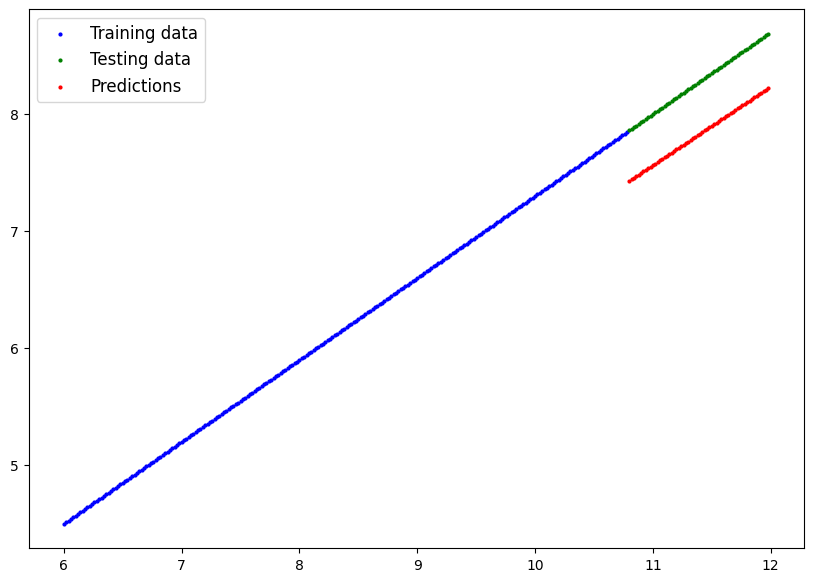

In [40]:
#let's plot the predections

plot_predictions(predictions=y_pred_new)

## Plotting the loss curves

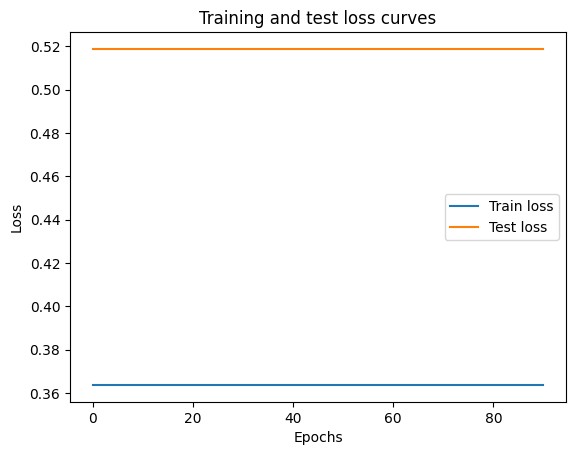

In [41]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a model in Pytorch
 There sre 3 min method or this
 1. torch.save()- it save the model in python pickle format.
 2. torch.load() - it allow you to load a save fptorch model.
 3. torch.nn.module.load_state_dicts() - it allow you to load the saved model dicts.

In [42]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [43]:
# Check the saved model file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1207 Aug  5 10:20 models/01_pytorch_workflow_model_0.pth


## Now, how to load our saved pytorch model


In [44]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6723])), ('bias', tensor([0.1688]))])

In [45]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [47]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6723])), ('bias', tensor([0.1688]))])

## Making predictions with trained model

In [55]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(x_test)
y_preds

tensor([[7.4295],
        [7.4430],
        [7.4564],
        [7.4699],
        [7.4833],
        [7.4968],
        [7.5102],
        [7.5237],
        [7.5371],
        [7.5506],
        [7.5640],
        [7.5774],
        [7.5909],
        [7.6043],
        [7.6178],
        [7.6312],
        [7.6447],
        [7.6581],
        [7.6716],
        [7.6850],
        [7.6985],
        [7.7119],
        [7.7254],
        [7.7388],
        [7.7522],
        [7.7657],
        [7.7791],
        [7.7926],
        [7.8060],
        [7.8195],
        [7.8329],
        [7.8464],
        [7.8598],
        [7.8733],
        [7.8867],
        [7.9001],
        [7.9136],
        [7.9270],
        [7.9405],
        [7.9539],
        [7.9674],
        [7.9808],
        [7.9943],
        [8.0077],
        [8.0212],
        [8.0346],
        [8.0481],
        [8.0615],
        [8.0749],
        [8.0884],
        [8.1018],
        [8.1153],
        [8.1287],
        [8.1422],
        [8.1556],
        [8

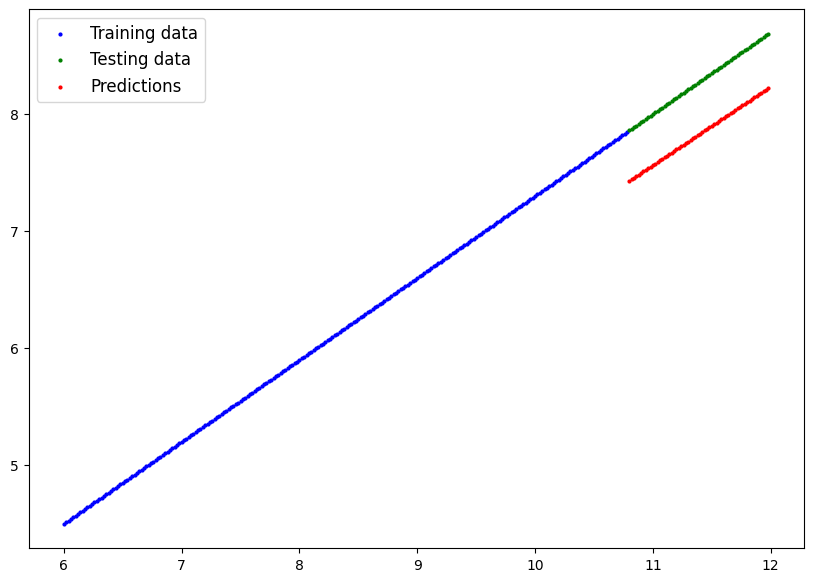

In [56]:
plot_predictions(predictions=y_preds)

In [57]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test) # perform a forward pass on the test data with the loaded model

In [58]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])